#Importing Libraries

In [1]:
import cv2
#import keras_cv
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Creating Model

In [2]:
def create_model():
    inputs = layers.Input((28, 28, 3))
    x = layers.Conv2D(filters=32, kernel_size=(3, 3))(inputs)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid')(x)

    x = layers.Conv2D(filters=64, kernel_size=(3, 3))(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [3]:
model_1 = create_model()
model_2 = create_model()
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,506 (6.33 MB)

 Trainable params: 1,658,506 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

#Data Preprocessing

In [4]:
(trX, trY), (tsX, tsY) = mnist.load_data()

# normalization
trainX = trX.astype('float32') / 255.0
testX = tsX.astype('float32') / 255.0

n = 20000
m = 1000
b = 1

# Convert grayscale to RGB
trainX = np.stack([cv2.cvtColor(trX[i], cv2.COLOR_GRAY2RGB) for i in range(n)])
testX = np.stack([cv2.cvtColor(tsX[i], cv2.COLOR_GRAY2RGB) for i in range(m)])

# for i in range(0,4):
#     plt.subplot(2,2,i+1)
#     plt.imshow(trainX[i+4])
# plt.show()

# One hot encoding
trainY = to_categorical(trY[:n], num_classes=10)
testY = to_categorical(tsY[:m], num_classes=10)

# print(trainY.shape)
# print(testY.shape)

# print(trainY[0])
# print(testY[0])

augdataGen = ImageDataGenerator(
    rotation_range = 10,
    height_shift_range = 0.19,
    width_shift_range = 0.11,
    shear_range = 4.3,
    zoom_range = 0.21
)
aug_train_data_frame = augdataGen.flow(trainX, trainY, batch_size=b, shuffle=False)
aug_test_data_frame = augdataGen.flow(testX, testY, batch_size=b, shuffle=False)

# Convert augmented data to lists
aug_trainX, aug_trainY = [], []
aug_testX, aug_testY = [], []

# Number of augmented samples you want to collect
num_augmented_train_samples = n
num_augmented_test_samples = m

for i in range(num_augmented_train_samples//b):
    aug_images, aug_labels = next(aug_train_data_frame)
    aug_trainX.extend(aug_images)
    aug_trainY.extend(aug_labels)

for i in range(num_augmented_test_samples//b):
    aug_images, aug_labels = next(aug_test_data_frame)
    aug_testX.extend(aug_images)
    aug_testY.extend(aug_labels)

# Convert list to numpy array
aug_trainX = np.array(aug_trainX)
aug_trainY = np.array(aug_trainY)
aug_testX = np.array(aug_testX)
aug_testY = np.array(aug_testY)

x_combined = np.concatenate((trainX, aug_trainX))
y_combined = np.concatenate((trainY, aug_trainY))

print(x_combined.shape)
print(y_combined.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(40000, 28, 28, 3)
(40000, 10)


#Plotting Model Training Curves

In [5]:
# Plot the accuracy and loss
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.tight_layout()
    plt.show()




In [6]:
opt = Adam(learning_rate = 0.0001)
my_callback = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7)]
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
opt = Adam(learning_rate = 0.0001)
my_callback = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7)]
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8497 - loss: 11.1928 - val_accuracy: 0.9550 - val_loss: 0.2872
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9572 - loss: 0.2314 - val_accuracy: 0.9615 - val_loss: 0.2197
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9654 - loss: 0.1813 - val_accuracy: 0.9555 - val_loss: 0.2061
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9765 - loss: 0.1023 - val_accuracy: 0.9520 - val_loss: 0.3050
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9815 - loss: 0.0980 - val_accuracy: 0.9600 - val_loss: 0.2860
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9834 - loss: 0.0796 - val_accuracy: 0.9688 - val_loss: 0.2782
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9863 - loss: 0.0749 - val_accuracy: 0.9688 - val_loss: 0.2828
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9863 - loss: 

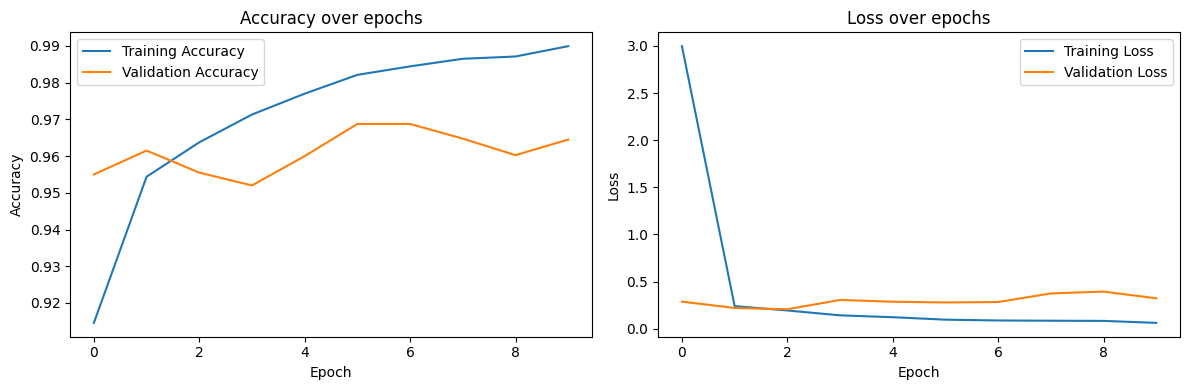

In [8]:
history = model_1.fit(trainX, trainY, validation_split=0.2, batch_size=4, shuffle=True, epochs=50, callbacks=my_callback)
plot_history(history)

#Training with Augmented Data

Epoch 1/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7961 - loss: 5.4769 - val_accuracy: 0.7816 - val_loss: 0.7071
Epoch 2/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9020 - loss: 0.3482 - val_accuracy: 0.8249 - val_loss: 0.6130
Epoch 3/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9346 - loss: 0.2316 - val_accuracy: 0.8424 - val_loss: 0.5921
Epoch 4/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9474 - loss: 0.1773 - val_accuracy: 0.8413 - val_loss: 0.6130
Epoch 5/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9593 - loss: 0.1379 - val_accuracy: 0.8609 - val_loss: 0.5438
Epoch 6/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9672 - loss: 0.1111 - val_accuracy: 0.8661 - val_loss: 0.5689
Epoch 7/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9739 - loss: 0.0889 - val_accuracy: 0.8750 - val_loss: 0.5681


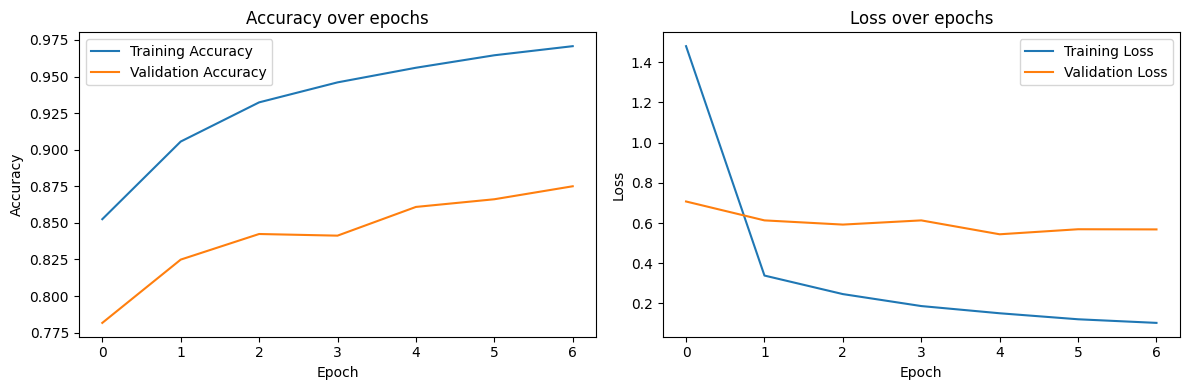

In [9]:
history = model_2.fit(x_combined, y_combined, validation_split=0.2, batch_size=4, shuffle=True, epochs=50, callbacks=my_callback)
plot_history(history)

#Comparing Results

In [10]:
result_1 = model_1.evaluate(testX, testY)
result_2 = model_1.evaluate(aug_testX, aug_testY)
result_3 = model_2.evaluate(testX, testY)
result_4 = model_2.evaluate(aug_testX, aug_testY)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9750 - loss: 0.1741
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6024 - loss: 5.4133
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9717 - loss: 0.1281
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8719 - loss: 0.5378


In [11]:
print("Training with original train data and Testing with original test data: accuracy = {}, loss = {}".format(result_1[1], result_1[0]))
print("Training with original train data and Testing with augmented test data: accuracy = {}, loss = {}".format(result_2[1], result_2[0]))
print("Training with original + augmented train data and Testing with original test data: accuracy = {}, loss = {}".format(result_3[1], result_3[0]))
print("Training with original + augmented train data and Testing with augmented test data: accuracy = {}, loss = {}".format(result_4[1], result_4[0]))

Training with original train data and Testing with original test data: accuracy = 0.9729999899864197, loss = 0.25806257128715515
Training with original train data and Testing with augmented test data: accuracy = 0.6069999933242798, loss = 5.319823741912842
Training with original + augmented train data and Testing with original test data: accuracy = 0.9660000205039978, loss = 0.17947305738925934
Training with original + augmented train data and Testing with augmented test data: accuracy = 0.8650000095367432, loss = 0.5703837871551514


In [12]:
def prediction_ability(model, X, Y):
	predicted_Y = model.predict(X)
	predicted_Y = np.argmax(predicted_Y, axis=-1)
	plt.figure(figsize = (12, 12))
	for i in range(9):
		plt.subplot(3, 3, i + 1)
		plt.imshow(X[i])
		plt.axis('off')
		title = predicted_Y[i]
		plt.title(title)
	plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


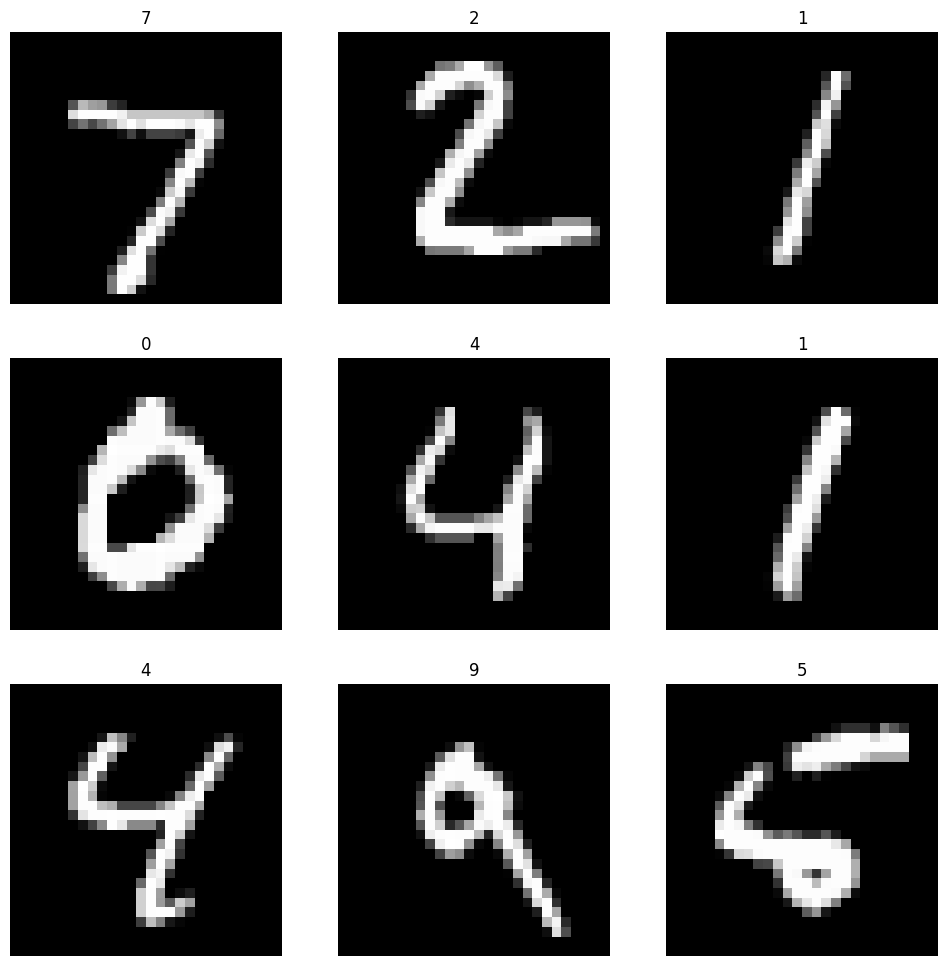

In [13]:
prediction_ability(model_1, testX, testY)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


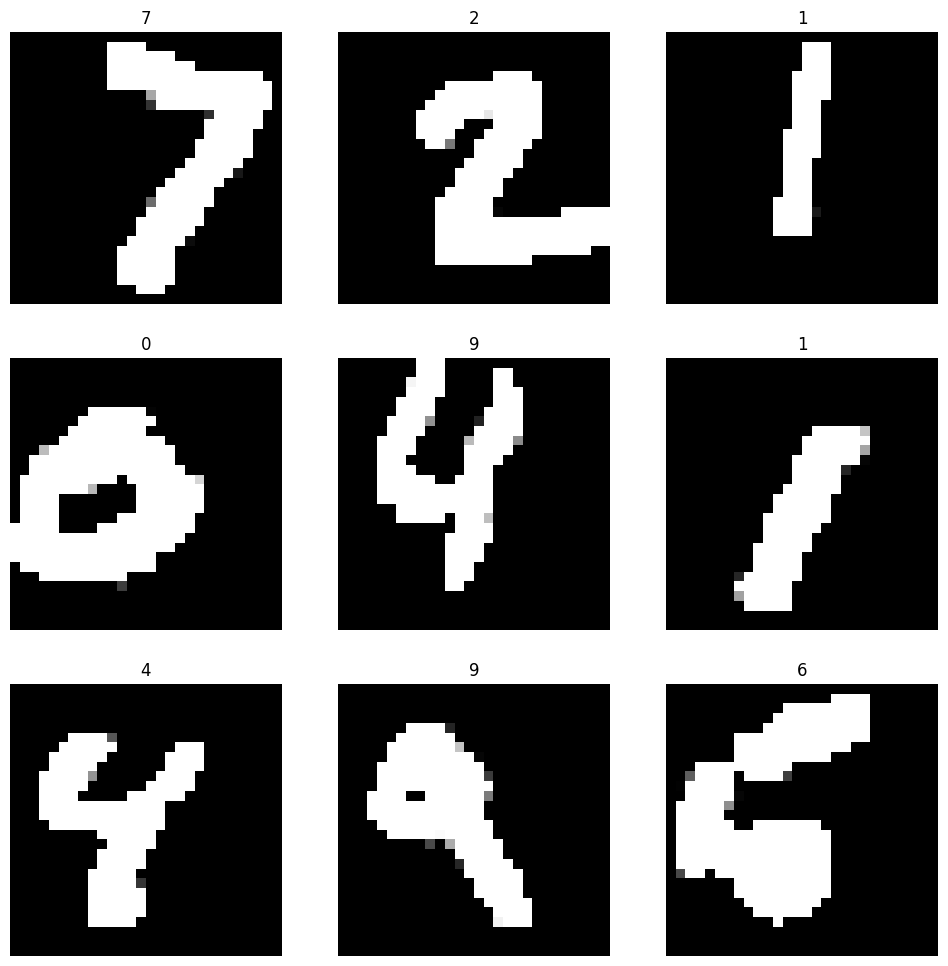

In [14]:
prediction_ability(model_2, aug_testX, aug_testY)